# Predicting Heart Disease Using Machine Learning

followins are the steps involve in building a project
* 1. Problem Defination
* 2. Data
* 3. Evaluation
* 4. Features
* 5. Modelling
* 6. Experimentation

## 1. Problem Defination

Given the available data can we predict weather a person have heart disease 

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing All our tools ready 

In [99]:
#importing all tools that we will need
#below are tools used for EDA (exploratyory data analysis) and ploting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#below are the sci-kit learn models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#below are the sci-kit learn evaluation function and methods
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve


In [100]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [101]:
df.shape

(303, 14)

#### Performing data expoltry data analysis

here we will find the more relations between the data

in this section we will cover
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [102]:
# 1. checking about the available data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [104]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

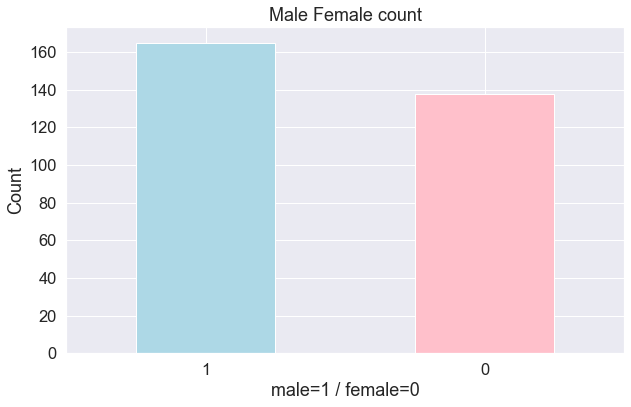

In [105]:
df["target"].value_counts().plot(kind="bar",figsize=(10,6), color=["lightblue","pink"], title="Male Female count", xlabel="male=1 / female=0", ylabel="Count");
plt.xticks(rotation=0);



In [106]:
df.info() #checking the infomation about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [107]:
df.isna().sum() # checking the missing data 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

*here we don't have any missing data if we encounter missing data then we have to go through the imputaion method to fill the missing value and other missing data handling method we can usr fillna(), dropna() to fill and drop the row containg the missing value

In [108]:
df.describe() # checking the discription of the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Compairing target(label) with other data(features) to find relationship between then

* Heart desease frequency with sex


In [109]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [110]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [111]:
pd.crosstab(df.target, df.sex)# comparing sex and target

sex,0,1
target,,
0,24,114
1,72,93


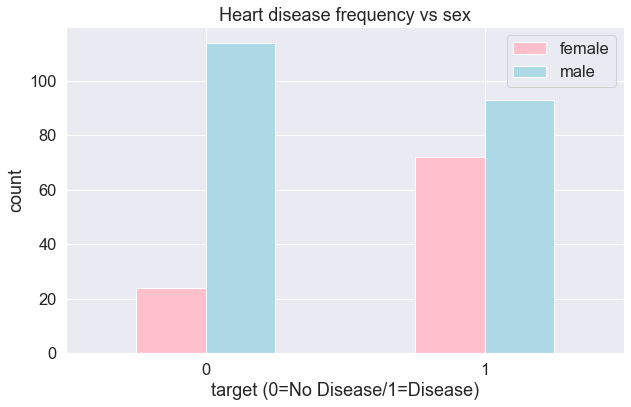

In [112]:
#ploting bar graph for clear picture of the relationship between target and sex column
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                     title="Heart disease frequency vs sex",
                                     xlabel="target (0=No Disease/1=Disease)",
                                     ylabel="count",
                                    color=["pink", "lightblue"]);
plt.legend(["female", "male"]); 
plt.xticks(rotation=0);

* Comparing age thalac and target

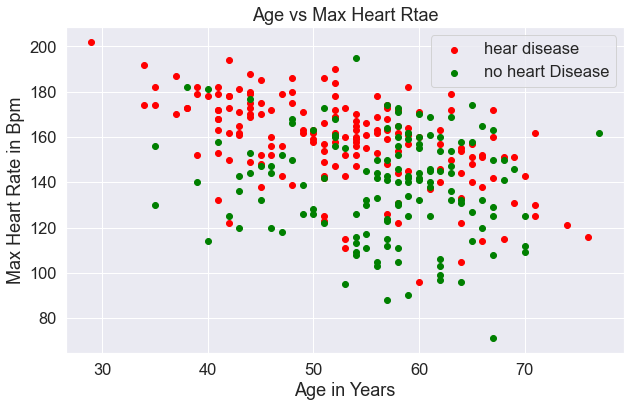

In [113]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="red"
           );
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="green"
           )
plt.title("Age vs Max Heart Rtae");
plt.xlabel("Age in Years");
plt.ylabel("Max Heart Rate in Bpm");
plt.legend(["hear disease", "no heart Disease"]);

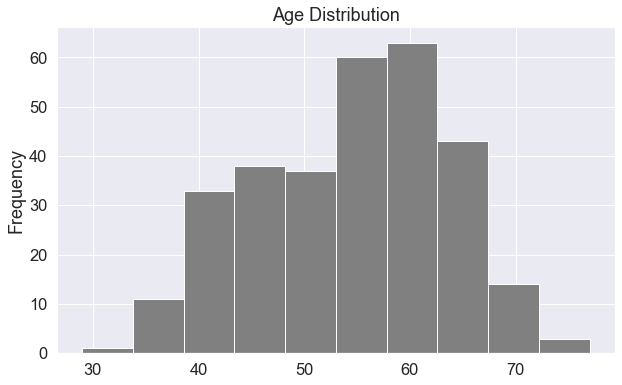

In [114]:
df["age"].plot(kind="hist",
               figsize=(10,6), 
               title= "Age Distribution" , 
               color="gray", 
               xlabel="Age in Years");

* checking for heart disease with relation to chest pain
cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [115]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


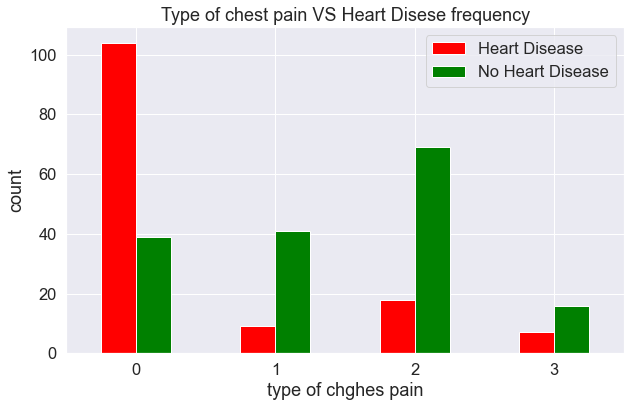

In [116]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                  title="Type of chest pain VS Heart Disese frequency",
                                  xlabel="type of chghes pain",
                                  ylabel="count",
                                   color= ["red", "green"]
                                  );
plt.xticks(rotation=0);
plt.legend(["Heart Disease", "No Heart Disease"]);


* Making correlation matyrix to understand how the colums are related to each other

In [117]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


*ploting the correlation matrix using seaborn heat map plot

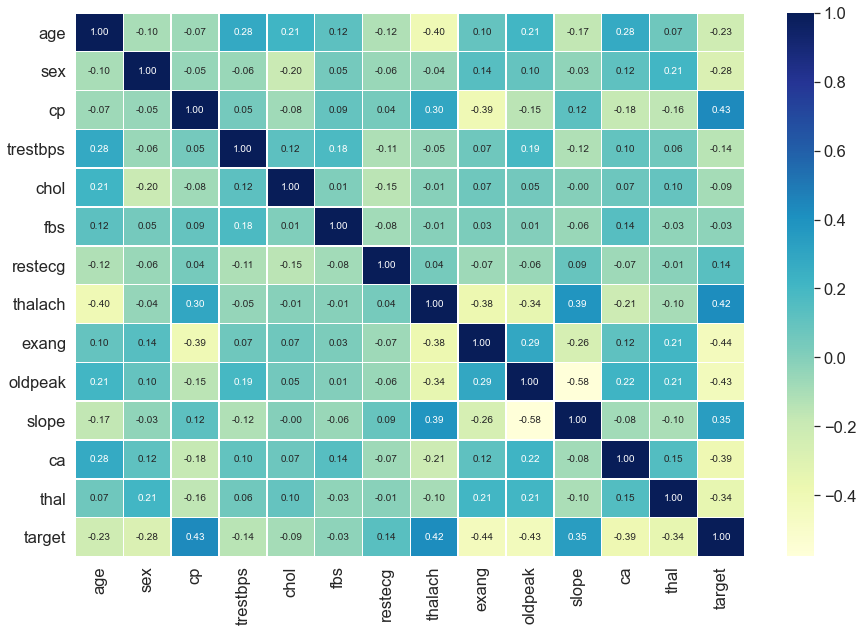

In [118]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
# bottom, top =ax.get_ylim()
#ax.set_ylim(bottom+0.5, top-0.5)
#above two function used if the top and bottom are not allinged

## 5. Modelling

In [119]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [120]:
# spliting the data into features(x) and label(y)
x = df.drop("target", axis=1)
y = df["target"]

In [121]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [122]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [123]:
# setting random seed
np.random.seed(42)

# spliting the data into training and test splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [124]:
len(x_train), len(y_train), len(x_test), len(y_test)

(242, 242, 61, 61)

**we are going to try three machine learning model
* 1. Logistic Rigression
* 2. K-nearest Neighbour
* 3. Ramdon Forest classifier

In [125]:
models = {"logistic Regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

#creating function to fit and score the model
def fit_and_score(models,x_train, x_test, y_test,  y_train):
    """
    this function fits and evaluate machine learning model
    models : a dictionary of diffrent scikit learn models
    x_train: training feature data
    x_test : testing feautre data
    y_train: training label data
    y_test : testing label data
    """
    #setting random seed for reproduceable result for evaluation
    np.random.seed(42)
    
    #making dictionary to store models scores
    model_scores ={}
    for name, model in models.items():
        #fitt the model to data
        model.fit(x_train, y_train)
        #evaluate data append data to dictionary
        model_scores[name] = model.score(x_test, y_test)
    return model_scores
    
    


In [126]:
#fitting the models matrix to the function we have created to fit and score the data
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [127]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare

,logistic Regression,KNN,Random Forest
Accuracy,0.885246,0.688525,0.836066


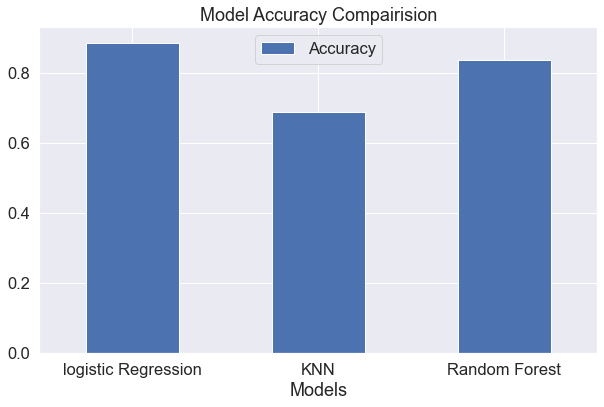

In [128]:
model_compare.T.plot(kind="bar",
                  figsize=(10,6),
                  title="Model Accuracy Compairision",
                  xlabel="Models",
                  )
plt.xticks(rotation=0);

now we have got our baseline mode score. now we can check how we can improve our model.
what should we do

lets look at the following points:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter Tuning (by hand)

In [129]:
# lets tune KNN
train_score =[]
test_score=[]
#creat list of diffrent number of neighbour
neighbors = range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

#looping through diffrent neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fitting the algorithm
    knn.fit(x_train, y_train)
    
    #updating the training score list
    train_score.append(knn.score(x_train, y_train))
    
    #updating the test score list
    test_score.append(knn.score(x_test, y_test))

In [130]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [131]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

The maximum KNN Score on the test data : 75.41%


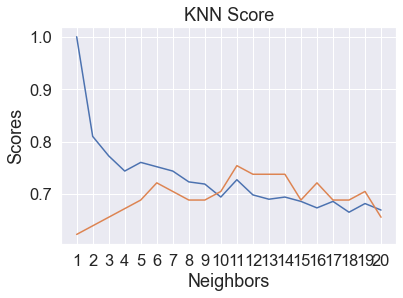

In [132]:
#ploting train score and test score
plt.plot(neighbors, train_score, label="train score")
plt.plot(neighbors, test_score, label="test score")
plt.title("KNN Score");
plt.xlabel("Neighbors");
plt.ylabel("Scores");
plt.xticks(range(1,21,1));
#plt.legend();
print(f"The maximum KNN Score on the test data : {max(test_score)*100:.2f}%")

from above graph it is observed that the knn have max accuracy at n=11 which is 74% whic is far less then other two model so we will drop this model from further evaluation and we will focus more on other two models

### Hyperparameter tuning with RandomizedSearchCV

we are going to tune following two models
* 1. Logistic Regrassion (LogisticRegression())
* 2. Random Forest Classifier (RandomForestClassifier())`

In [133]:
# creating hyperparameter grid for Logistic Rigression
log_reg_grid = {"C":np.logspace(-5,5,30),
               "solver": ["liblinear"]}

#creating hyperparameter grid for Randon forest classiffier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


In [134]:
#tuning logistic regressor model
np.random.seed(42)

#setting RandomizedSerchCV for LogesticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-05, 2.21221629e-05, 4.89390092e-05, 1.08263673e-04,
       2.39502662e-04, 5.29831691e-04, 1.17210230e-03, 2.59294380e-03,
       5.73615251e-03, 1.26896100e-02, 2.80721620e-02, 6.21016942e-02,
       1.37382380e-01, 3.03919538e-01, 6.72335754e-01, 1.48735211e+00,
       3.29034456e+00, 7.27895384e+00, 1.61026203e+01, 3.56224789e+01,
       7.88046282e+01, 1.74332882e+02, 3.85662042e+02, 8.53167852e+02,
       1.88739182e+03, 4.17531894e+03, 9.23670857e+03, 2.04335972e+04,
       4.52035366e+04, 1.00000000e+05]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [135]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.1373823795883264}

In [136]:
#evaluating the logistic parameter for best parameter
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [137]:
# setting RandomizedSearchCV for RandomForestRegressor
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [138]:
#getting best params for random forest classifier
rs_rfc.best_params_

{'n_estimators': 760,
 'min_samples_split': 18,
 'min_samples_leaf': 9,
 'max_depth': 3}

In [139]:
#getting score for best params
rs_rfc.score(x_train, y_train)

0.8636363636363636

this score is better then the before hyperparameter tunung but it is  less then the logistic regression model we will leave Random forest and move ahed with logisctic regression model

### Hyperparameter tuning using GridSerachCV

In [140]:
# creating grid for GridserchCV
gs_log_reg_grid = {"C":np.logspace(-5,5,50),
               "solver": ["liblinear"]}
#setting up GridSearchCV 
gs_log_rig = GridSearchCV(LogisticRegression(),
                         param_grid=gs_log_reg_grid,
                         cv=5,
                         verbose=True)
#fitting training data to model
gs_log_rig.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.714866...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'solver': ['liblinear']},
             verbose=True)

In [141]:
#checking best params
gs_log_rig.best_params_

{'C': 0.19306977288832497, 'solver': 'liblinear'}

In [142]:
#evaluating model for best params
gs_log_rig.score(x_test, y_test)

0.8852459016393442

### Evaluating ML model beond accuracy and evalute for following parameter

* 1. ROC curve(plot_roc_curve(gs_log_rig, x_test, y_test);)
* 2. Confusion Matrix(confusion_matrix(y_test, y_preds))
* 3. Classification Report(classification_report(y_test, y_preds))
* 4. Precision
* 5. Recall
* 6. F1 Score
*used cross validation where possible

In [143]:
#make prediction with tuned model
y_preds = gs_log_rig.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

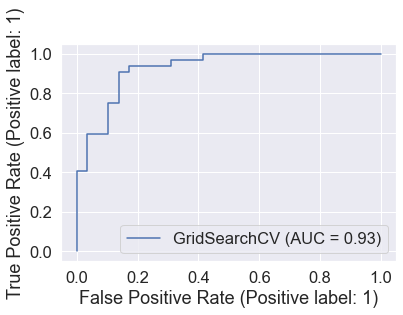

In [144]:
# ploting ROC and finding AUC
plot_roc_curve(gs_log_rig, x_test, y_test);

In [145]:
#ploting confusion matrix
print(confusion_matrix(y_test, y_preds))


[[25  4]
 [ 3 29]]


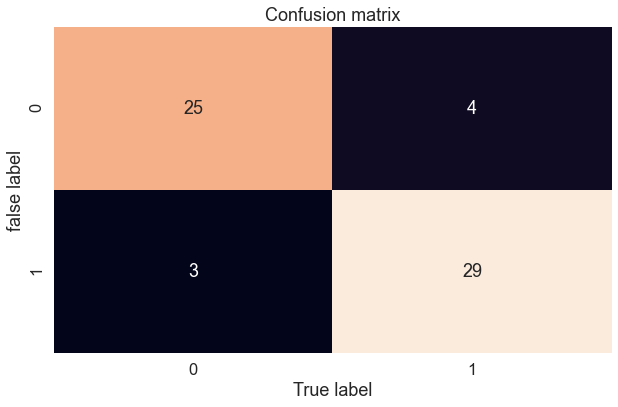

In [146]:
sns.set(font_scale=1.5)

def plot_confu_mat(y_test, y_preds):
    """
    plot confusion nmatrix using seaborn heatmap plot
    """
    fig, ax = plt.subplots(figsize=(10,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False,
                    )
    plt.xlabel("True label");
    plt.ylabel("false label");
    plt.title("Confusion matrix")
    
plot_confu_mat(y_test, y_preds)

In [147]:
# printing classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [148]:
#tuned models best parameters
gs_log_rig.best_params_

{'C': 0.19306977288832497, 'solver': 'liblinear'}

In [149]:
#creating instent for tuned model with best parameters
clf = LogisticRegression(C= 0.19306977288832497,
                        solver="liblinear")

In [150]:
#calculating cross validated model accuracy
cv_acc= cross_val_score(clf,
                        x,
                        y,
                       cv=5,
                       scoring="accuracy")
cv_acc= np.mean(cv_acc)
cv_acc

0.8446994535519124

In [151]:
#calculating cross validated model precision
cv_precision = cross_val_score(clf,
                        x,
                        y,
                       cv=5,
                       scoring="precision")
cv_precision= np.mean(cv_precision)
cv_precision

0.8207936507936507

In [152]:
#calculating cross validated recall score
cv_recall = cross_val_score(clf,
                        x,
                        y,
                       cv=5,
                       scoring="recall")
cv_recall= np.mean(cv_recall)
cv_recall

0.9212121212121213

In [153]:
#calculating cross validated F1 score 
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                       cv=5,
                       scoring="f1")
cv_f1= np.mean(cv_f1)
cv_f1

0.8673007976269721

In [154]:
#creating cross validated matrix
cv_matrix = pd.DataFrame({"Accuracy":cv_acc,
                        "Precision score":cv_precision,
                        "recall score":cv_recall,
                        "F1 score":cv_f1}, index=[0])
cv_matrix

,Accuracy,Precision score,recall score,F1 score
0,0.844699,0.820794,0.921212,0.867301


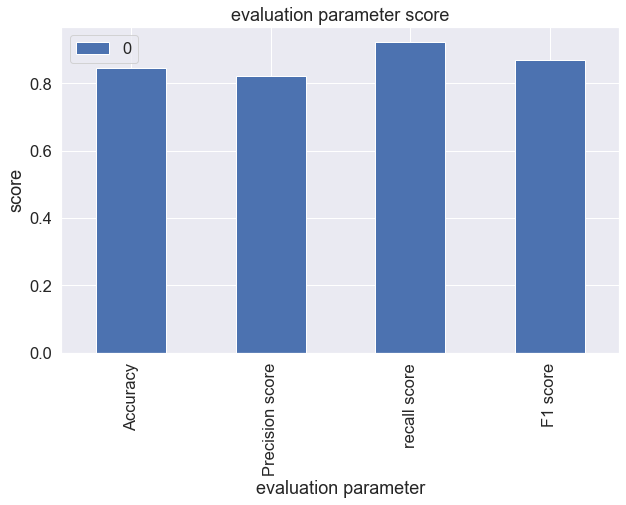

In [155]:
#ploting evaluation parameters
cv_matrix.T.plot(kind="bar", figsize=(10,6))
plt.xlabel("evaluation parameter");
plt.ylabel("score");
plt.title("evaluation parameter score");


### Finding most important parameters

In [156]:
# fitting instant of best parameters
clf = LogisticRegression(C= 0.19306977288832497,
                        solver="liblinear")
clf.fit(x_test, y_test)

LogisticRegression(C=0.19306977288832497, solver='liblinear')

In [157]:
#getting correlation coeficent matrix
coeficent_dict = dict(zip(df.columns,list(clf.coef_[0])))
coeficent_dict

{'age': 0.04804984147031752,
 'sex': -0.27898798864312574,
 'cp': 0.7144729828814382,
 'trestbps': -0.052229667386904204,
 'chol': -0.008577345419862025,
 'fbs': -0.16229505407961264,
 'restecg': 0.2659923483913623,
 'thalach': 0.05243649770782252,
 'exang': -0.08163528294769498,
 'oldpeak': -0.20554160002340124,
 'slope': -0.16050121691058925,
 'ca': -0.4645179279617715,
 'thal': -0.266187193041511}

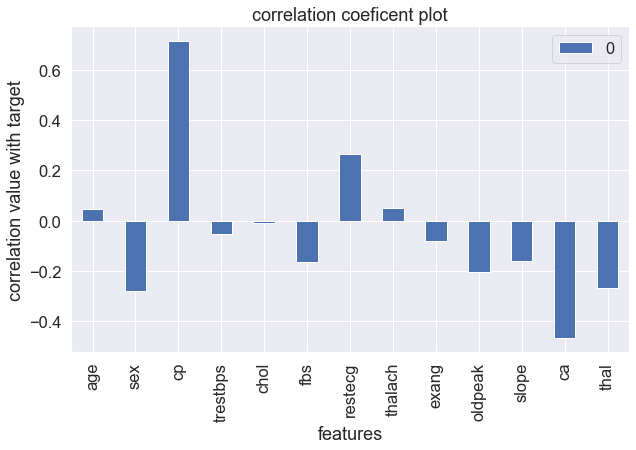

In [160]:
coeficent_df = pd.DataFrame(coeficent_dict, index=[0])
coeficent_df.T.plot(kind="bar", figsize=(10,6))
plt.title("correlation coeficent plot");
plt.xlabel("features");
plt.ylabel("correlation value with target");


from above result we can obtain that the model is least depend on the parameter such as chol and we can sugest the elimination of such parameter

* we didnt achived 95 % accuracy, we get aroung 89% which is good score.
* the score can be increse by training the model on more data( increse the data)
* we have used the three best suitabke model for classification problem although due to availibility of more models we can use othaer models alos to enhance and obtain more score in accuracy`